In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
#import statsmodels as sm
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, accuracy_score)

import folium
import json
from folium import plugins


In [33]:
inspections_reviews_merge1 = pd.read_csv('inspections_reviews_merge1.csv')
restaurant_attributes = pd.read_csv('restaurant_attributes.csv')

In [357]:
#print(inspections_reviews_merge1.shape)
#print(restaurant_attributes.shape)

In [150]:
restaurant_attributes['converted_date']= pd.to_datetime(inspections_reviews_merge1['Inspection Date'])
restaurant_attributes['month_year'] = restaurant_attributes['converted_date'].astype('datetime64[M]')

In [364]:
full_dataset = pd.concat([restaurant_attributes,inspections_reviews_merge1],axis = 1)
print(full_dataset.shape)
full_dataset = full_dataset.loc[:,~full_dataset.columns.duplicated()]
print(full_dataset.shape)
full_dataset.head(1)

(5960, 271)
(5960, 266)


,Unnamed: 0,Restaurant Name,Zip Code,Inspection Date,Facility ID,Process Description,letter_grade,addr_line_1,business_id,latitude,longitude,converted_date,month_year,reviews_count,useful_sum,funny_sum,cool_sum,stars_1.0_sum,stars_2.0_sum,stars_3.0_sum,stars_4.0_sum,stars_5.0_sum,stars_nan_sum,stars,review_count,is_open,Score,Active Life,American (New),American (Traditional),Arts & Entertainment,Asian Fusion,Bagels,Bakeries,Barbeque,Bars,Beauty & Spas,Beer,Beer Bar,Breakfast & Brunch,Breweries,Bubble Tea,Buffets,Burgers,Cafes,Cajun/Creole,Caterers,Chicken Shop,Chicken Wings,Chinese,Cocktail Bars,Coffee & Tea,Comfort Food,Convenience Stores,Cooking Schools,Cosmetics & Beauty Supply,Delis,Desserts,Dim Sum,Diners,Dive Bars,Education,Event Planning & Services,Fast Food,Florists,Flowers & Gifts,Food,Food Court,Food Delivery Services,Food Stands,Food Trucks,French,Fruits & Veggies,Gastropubs,Gluten-Free,Greek,Grocery,Halal,Health Markets,Home Services,Hot Dogs,Hotels,Hotels & Travel,Ice Cream & Frozen Yogurt,Indian,Italian,Japanese,Juice Bars & Smoothies,Korean,Latin American,Local Flavor,Local Services,Lounges,Meat Shops,Mediterranean,Mexican,Middle Eastern,Music Venues,Nightlife,Party & Event Planning,Pizza,Pubs,Restaurants,Salad,Sandwiches,Seafood,Shopping,Shopping Centers,Soul Food,Soup,Southern,Specialty Food,Specialty Schools,Sports Bars,Steakhouses,Sushi Bars,Tacos,Tapas/Small Plates,Tex-Mex,Thai,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Wine & Spirits,HasTV,ByAppointmentOnly,RestaurantsTableService,DogsAllowed,HappyHour,DriveThru,WheelchairAccessible,RestaurantsDelivery,RestaurantsTakeOut,Caters,RestaurantsReservations,CoatCheck,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,Corkage,GoodForKids,BYOBCorkage,BusinessAcceptsBitcoin,RestaurantsPriceRange2,RestaurantsGoodForGroups,GoodForDancing,BYOB,Open24Hours,DietaryRestrictions,RestaurantsCounterService,AcceptsInsurance,Zip Code_78617,Zip Code_78620,Zip Code_78653,Zip Code_78660,Zip Code_78701,Zip Code_78702,Zip Code_78703,Zip Code_78704,Zip Code_78705,Zip Code_78719,Zip Code_78721,Zip Code_78722,Zip Code_78723,Zip Code_78724,Zip Code_78726,Zip Code_78727,Zip Code_78728,Zip Code_78729,Zip Code_78730,Zip Code_78731,Zip Code_78732,Zip Code_78733,Zip Code_78734,Zip Code_78735,Zip Code_78736,Zip Code_78738,Zip Code_78741,Zip Code_78744,Zip Code_78745,Zip Code_78746,Zip Code_78748,Zip Code_78749,Zip Code_78750,Zip Code_78751,Zip Code_78752,Zip Code_78753,Zip Code_78754,Zip Code_78756,Zip Code_78757,Zip Code_78758,Zip Code_78759,Zip Code_nan,Alcohol_0,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',Alcohol_nan,WiFi_0,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_u'free',WiFi_u'no',WiFi_nan,RestaurantsAttire_0,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_nan,NoiseLevel_0,NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',NoiseLevel_u'average',NoiseLevel_u'loud',NoiseLevel_u'quiet',NoiseLevel_u'very_loud',NoiseLevel_nan,Smoking_0,Smoking_'no',Smoking_u'no',Smoking_u'outdoor',Smoking_u'yes',Smoking_nan,garage,lot,street,valet,validated,breakfast,brunch,dessert,dinner,latenight,lunch,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,background_music,dj,jukebox,karaoke,live,no_music,video,friday,monday,saturday,sunday,thursday,tuesday,wednesday,pass_fail_flag
0,0,CASINO EL CAMINO,78701,2018-08-13,2800956.0,Routine Inspection,C,517 E 6TH ST,KjaK4CsJ_PypmVBncLwWAA,77606 30.264840\n56196 30.266555\n5694...,77606 -97.730867\n56196 -97.733032\n5694...,2018-08-13,2018-08-01,13.0,10.0,12.0,13.0,2.0,1.0,0.0,5.0,5.0,0.0,3.5,1227.0,1.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [74]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)

In [338]:
#inspections_reviews_merge1.info()

In [417]:
#inspections_reviews_merge1.dtypes

In [494]:
#restaurant_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           5960 non-null   int64         
 1   Restaurant Name      5960 non-null   object        
 2   Zip Code             5960 non-null   int64         
 3   Inspection Date      5960 non-null   object        
 4   Facility ID          5960 non-null   float64       
 5   Process Description  5960 non-null   object        
 6   letter_grade         5960 non-null   object        
 7   addr_line_1          5960 non-null   object        
 8   business_id          5960 non-null   object        
 9   latitude             5960 non-null   object        
 10  longitude            5960 non-null   object        
 11  converted_date       5960 non-null   datetime64[ns]
 12  month_year           5960 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1),

## How is the data distributed?

#### Inspection Scores tend to be relatively high

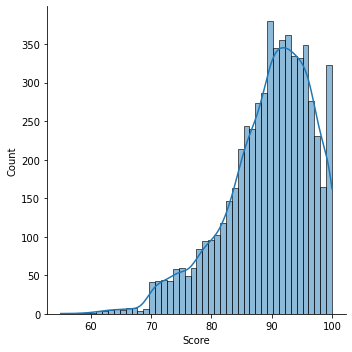

In [537]:
sns.displot(data = inspections_reviews_merge1, x = 'Score', kind = 'hist', palette = 'YlGnBu', kde= True)
plt.show();

#### The majority of reviews on Yelp are also positive

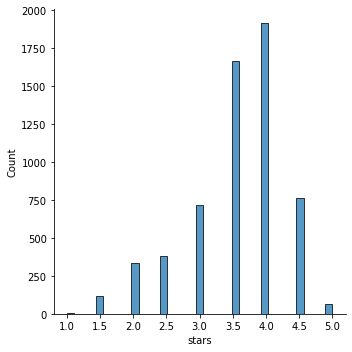

In [538]:
sns.displot(data = inspections_reviews_merge1, x = 'stars', palette = 'YlGnBu', kind = 'hist')
plt.show();

#### Restaurant with high and low ratings on Yelp generally have high inspection scores

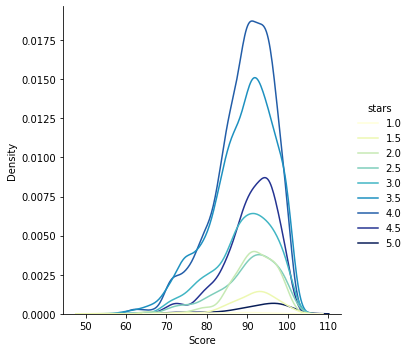

In [539]:
sns.displot(data = inspections_reviews_merge1, x = 'Score', hue = 'stars', palette ='YlGnBu', kind = 'kde');
plt.show();

### The mean inspection score for restaurants with a drive-thru window (~10% of restaurant inspections) is comparable to that of restaurants without one

In [351]:
inspections_reviews_merge1['DriveThru'].value_counts(normalize=True)

0.0    0.896812
1.0    0.103188
Name: DriveThru, dtype: float64

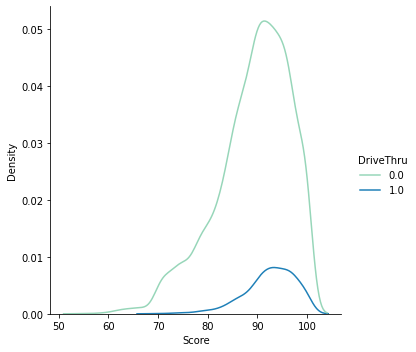

In [543]:
sns.displot(data = inspections_reviews_merge1, x = 'Score', hue = 'DriveThru', palette ='YlGnBu', kind = 'kde');

### Similarly, price range doesn't appear to have a huge impact on score

In [430]:
inspections_reviews_merge1['RestaurantsPriceRange2'].value_counts(normalize=True)

1    0.442617
2    0.436074
0    0.083054
3    0.030537
4    0.007718
Name: RestaurantsPriceRange2, dtype: float64

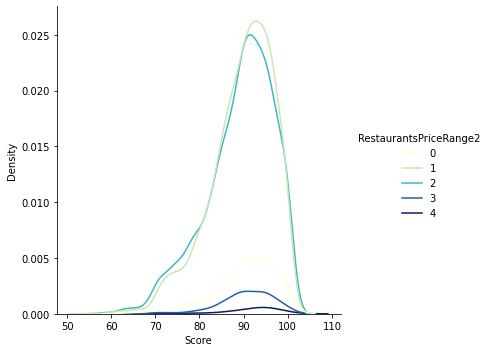

In [544]:
sns.displot(data = inspections_reviews_merge1, x = 'Score', hue = 'RestaurantsPriceRange2', palette ='YlGnBu', kind = 'kde');

### Most restaurants have very few reviews (over a rolling 60 window prior to the Inspection)

<Figure size 864x864 with 0 Axes>

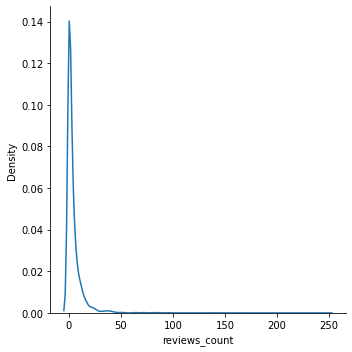

In [635]:
import matplotlib
plt.figure(figsize = (12,12));
#matplotlib.rc_file_defaults()

sns.displot(data = inspections_reviews_merge1, x = 'reviews_count', palette ='YlGnBu', kind = 'kde');

In [383]:
# adding a column for viz

full_dataset['rest_plus_inspection_date'] = full_dataset['Restaurant Name'] + " | " + full_dataset['Inspection Date']

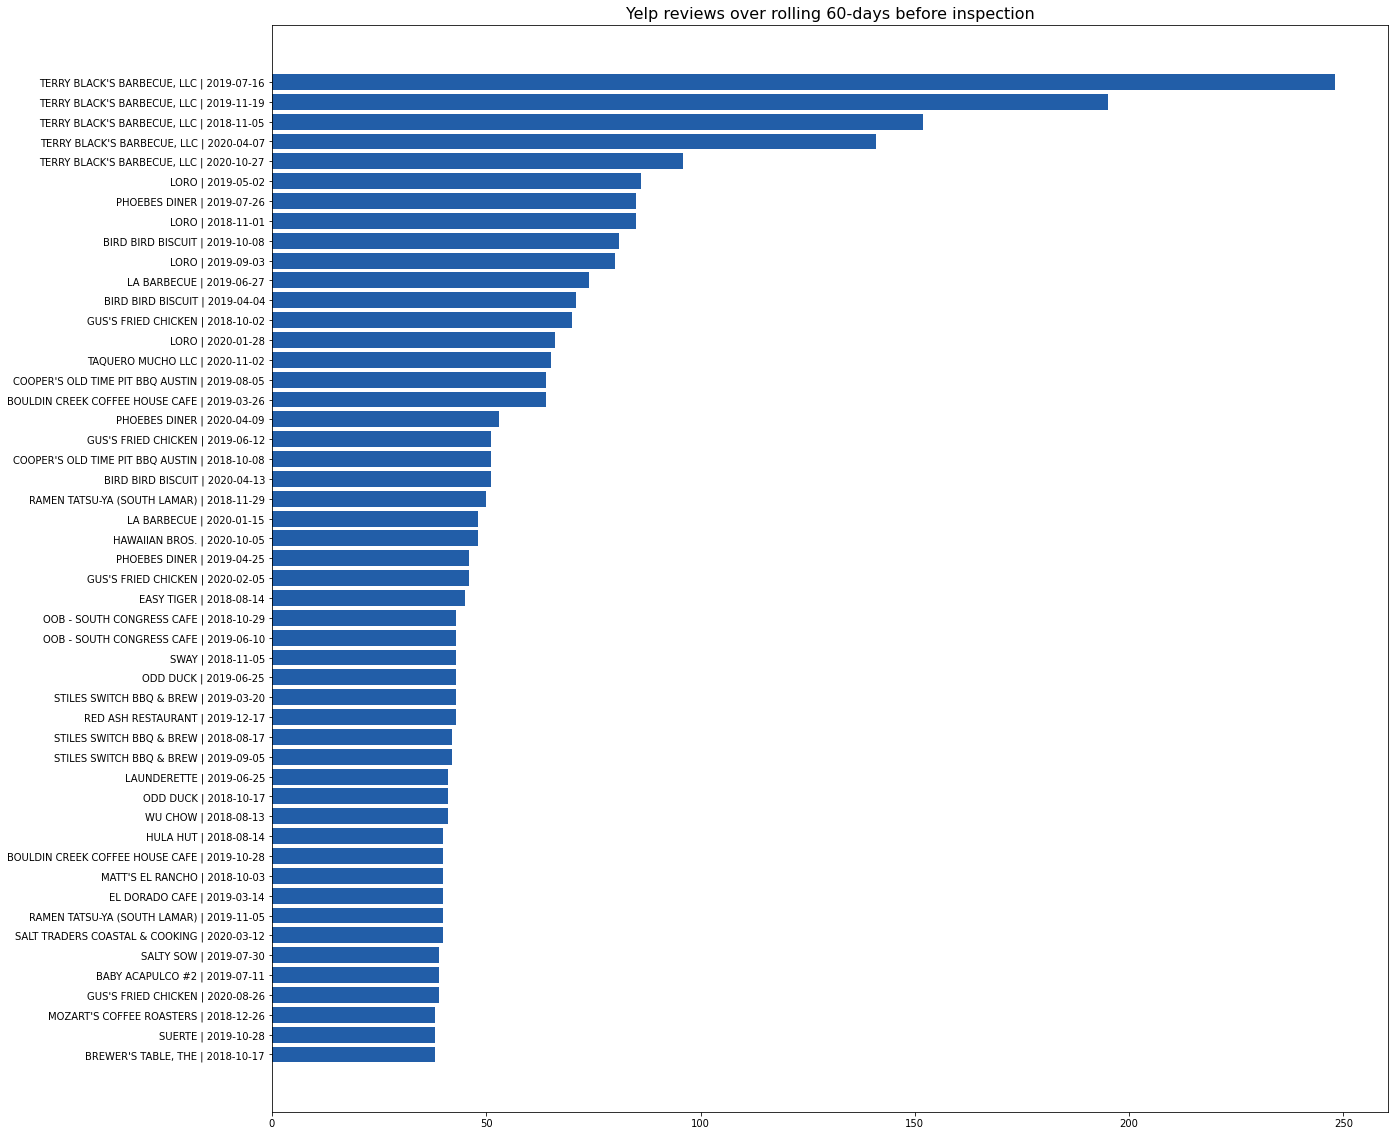

In [673]:
# Sort the table
plt.figure(figsize = (20,20))

df = full_dataset[['rest_plus_inspection_date','reviews_count']].groupby(['rest_plus_inspection_date']).min().sort_values(by=['reviews_count']).reset_index().tail(50)

# Create horizontal bars
plt.barh(y=df['rest_plus_inspection_date'], width=df['reviews_count'],color ='#225ea8');

# Add title
plt.title('Yelp reviews over rolling 60-days before inspection', size = 16);

In [643]:
inspections_reviews_merge1[['Score', 'stars', 'reviews_count']].describe()

,Score,stars,reviews_count,review_count
count,5960.000000,5960.000000,5960.000000,5960.000000
mean,89.589933,3.555034,4.239765,275.227013
std,7.303317,0.731194,9.169640,386.733278
min,55.000000,1.000000,0.000000,5.000000
25%,86.000000,3.000000,0.000000,47.000000
50%,91.000000,3.500000,1.000000,134.000000
75%,95.000000,4.000000,5.000000,384.000000
max,100.000000,5.000000,248.000000,4942.000000


### The data is highly imbalanced between passes and fails

In [336]:
inspections_reviews_merge1['letter_grade'].value_counts(normalize=True)

A    0.579362
B    0.315772
C    0.096309
F    0.008557
Name: letter_grade, dtype: float64

In [142]:
inspections_reviews_merge1['converted_date']= pd.to_datetime(inspections_reviews_merge1['Inspection Date'])
inspections_reviews_merge1['month_year'] = inspections_reviews_merge1['converted_date'].astype('datetime64[M]')
#inspections_reviews_merge1['month_year'].head()

In [122]:
grades = pd.get_dummies(inspections_reviews_merge1['letter_grade'], dummy_na=True, prefix = 'lg')

grade_ts = pd.concat([inspections_reviews_merge1[['month_year']],grades],axis=1)

print(grade_ts.shape)
grade_ts = grade_ts.groupby(['month_year']).sum().reset_index()
print(grade_ts.shape)

grade_ts.head()

(5960, 6)
(36, 6)


,month_year,lg_A,lg_B,lg_C,lg_F,lg_nan
0,2018-08-01,70,53,17,0,0
1,2018-09-01,98,46,8,0,0
2,2018-10-01,83,70,14,0,0
3,2018-11-01,60,33,3,0,0
4,2018-12-01,66,47,10,1,0


#### The distribution of letter grades looks relatively stationary over time

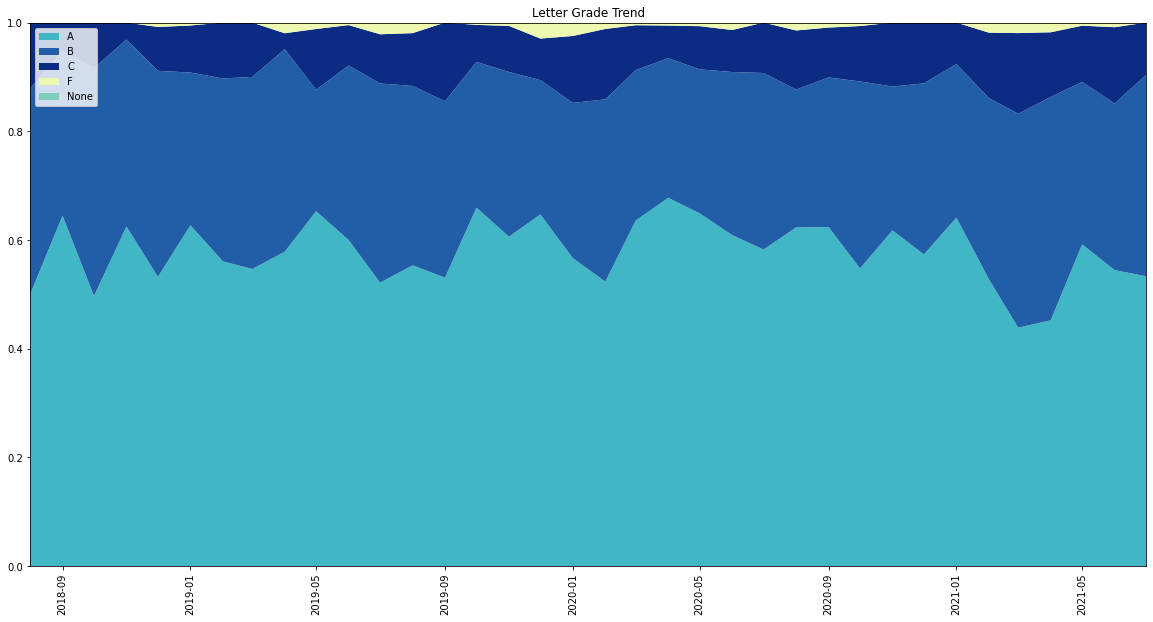

In [332]:
 # We need to transform the data from raw data to percentage (fraction)

#from matplotlib import cm

data_perc = (grade_ts.drop(['month_year'],axis = 1)).divide((grade_ts.drop(['month_year'],axis = 1)).sum(axis=1), axis=0)
 
color_map = ["#41b6c4","#225ea8","#0c2c84","#edf8b1","#7fcdbb"]
#plt.stackplot(x, y, colors = color_map)
    
plt.figure(figsize = (20,10))
plt.stackplot(grade_ts['month_year'],  data_perc["lg_A"],  data_perc["lg_B"],  data_perc["lg_C"],  data_perc["lg_F"],  data_perc["lg_nan"], colors = color_map, labels=['A','B','C','F','None'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Letter Grade Trend')

plt.xticks(rotation=90)

plt.show()

#### How do scores change over time for specific restaurants?

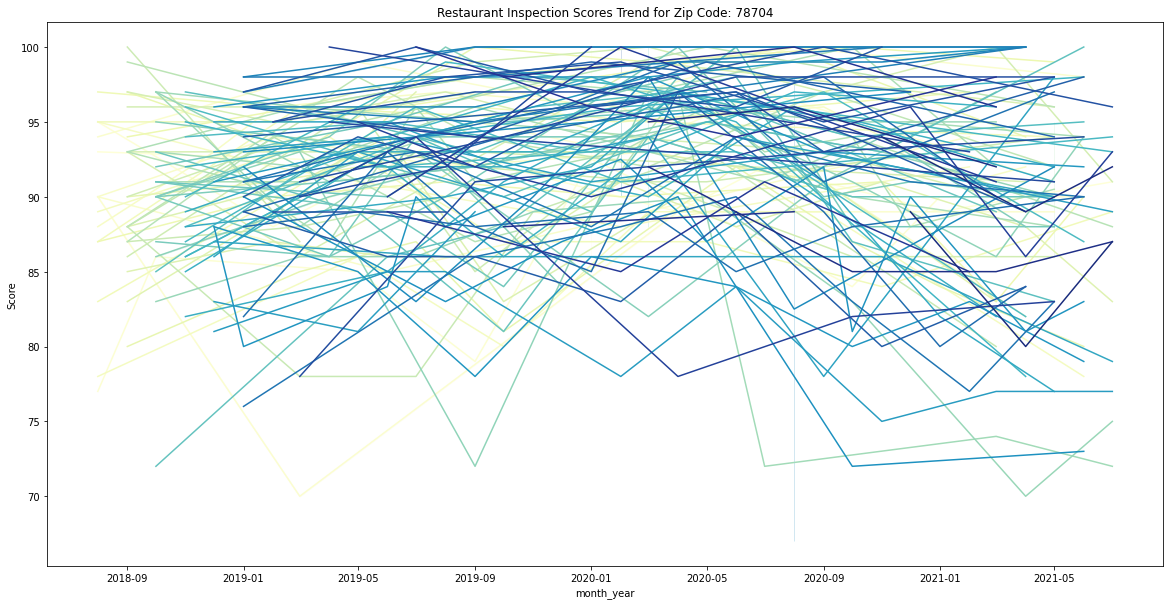

In [414]:
# how have inspection scores trended over time in general?

plt.figure(figsize = (20,10))
sns.lineplot(
    data = full_dataset[['Restaurant Name','month_year','Score']].loc[full_dataset['Zip Code'] == 78704],
    x="month_year", y="Score", hue="Restaurant Name", palette = 'YlGnBu', legend=False
);

plt.title('Restaurant Inspection Scores Trend for Zip Code: 78704');
#plt.legend(loc = "upper right");

#sns.lineplot(
#    data = df[(df['time_delta'] <= 249) & (df['flag'] == True)],
#    x="time_delta", y="temp_delta", hue="file", palette=sns.color_palette(['lightcoral'], len(df[(df['time_delta'] <= 249) & (df['flag'] == True)]['file'].unique())), legend=False
#)

#sns.lineplot(data=df_summary, x="time_delta", y="temp_delta_mean", color='blue', linestyle='--', linewidth = 2)
#sns.lineplot(data=df_summary, x="time_delta", y="temp_delta_lower", color='blue', linestyle='--', linewidth = 4)
#plt.axvline(x=249, linestyle='--', color='silver')
#plt.axhline(y=4, linestyle='--', color='silver')

#### a bit of a mixed bag...let's break it out further

#### How much have we seen the score for a given restaurant change?

In [449]:
min_max_scores = pd.DataFrame()
min_max_scores = full_dataset[['Restaurant Name','Score']].groupby(['Restaurant Name']).max().reset_index()
min_max_scores.columns = ['Restaurant Name','max_score']
min_max_scores['min_score'] = full_dataset[['Restaurant Name','Score']].groupby(['Restaurant Name']).min().reset_index()['Score']
min_max_scores['diff'] = min_max_scores['max_score'] - min_max_scores['min_score']
min_max_scores.sort_values(by=['diff'], ascending=False).head(10)

,Restaurant Name,max_score,min_score,diff
998,TAQUERIA ARANDINAS BOTANERO SPORTS BAR,95.0,58.0,37.0
272,DK MARIA'S LEGENDARY TEX MEX,100.0,65.0,35.0
887,SHANGHAI CHINESE RESTAURANT,100.0,67.0,33.0
591,LUCY'S FRIED CHICKEN,99.0,67.0,32.0
861,RUSSIAN BISTRO NAZDOROVYE,96.0,65.0,31.0
806,PIZZA HOUSE,94.0,64.0,30.0
1059,TYSON'S TACOS,94.0,64.0,30.0
43,ASIA CAFE,100.0,70.0,30.0
587,LUBY'S/ FUDDRUCKERS,100.0,71.0,29.0
669,NASHA,97.0,68.0,29.0


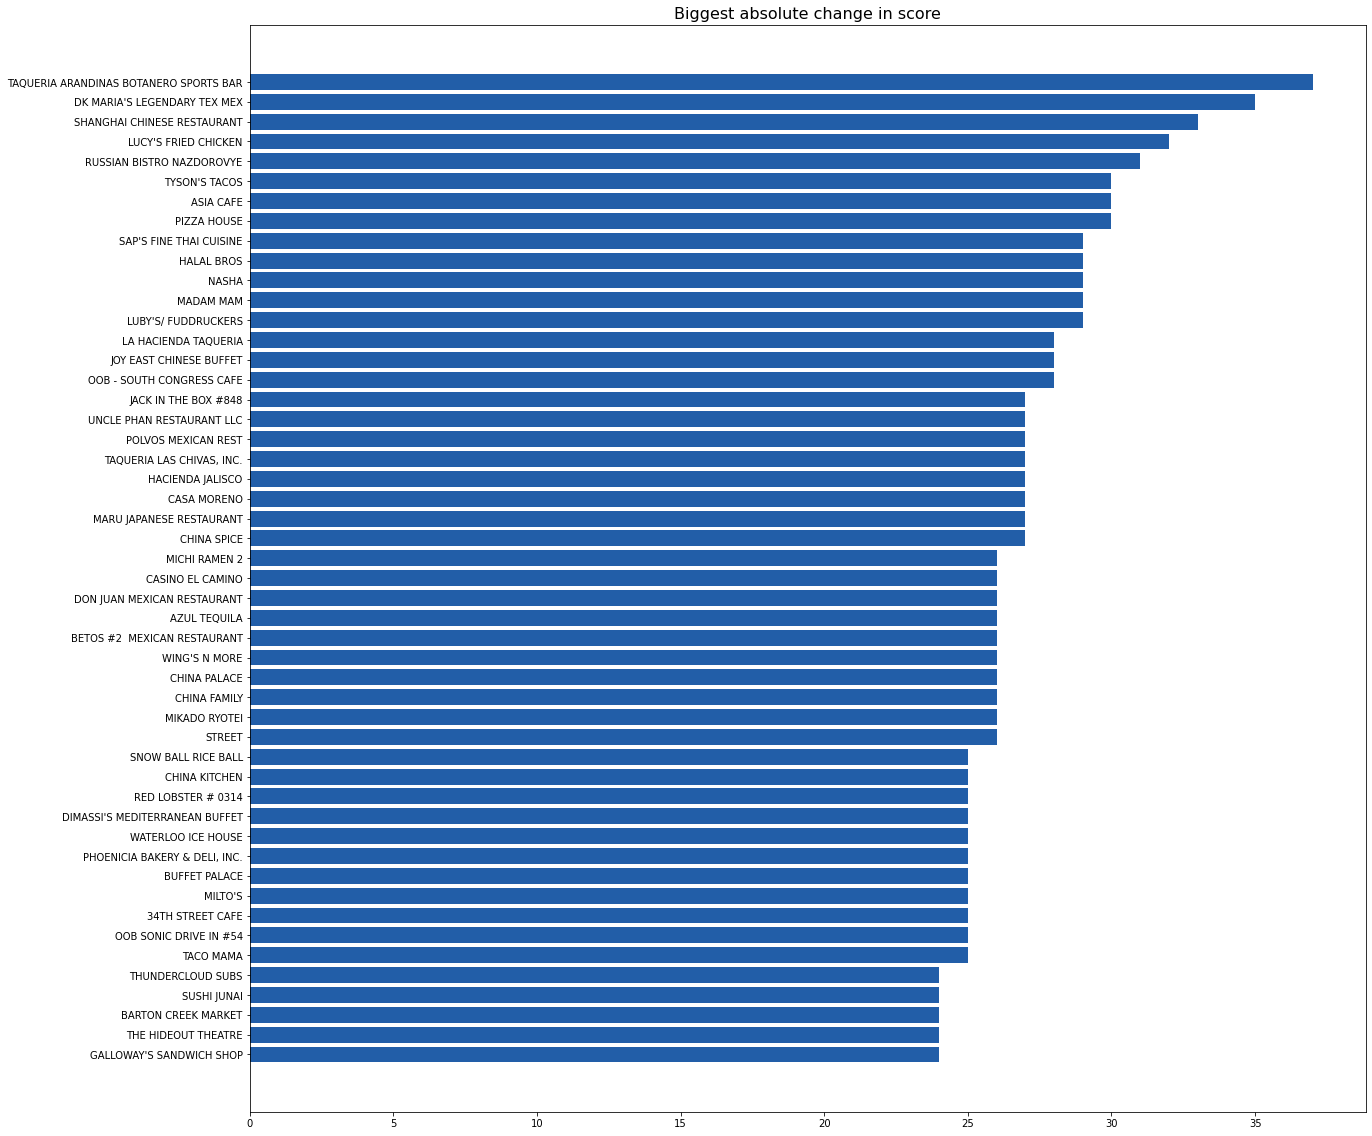

In [451]:
# Sort the table
plt.figure(figsize = (20,20))

df = min_max_scores.sort_values(by=['diff']).reset_index().tail(50)

# Create horizontal bars
plt.barh(y=df['Restaurant Name'], width=df['diff'],color ='#225ea8');

# Add title
plt.title('Biggest absolute change in score', size = 16);

In [498]:
#full_dataset['Facility ID'][0]

In [642]:
lag_scores = full_dataset[['Restaurant Name','Zip Code','Facility ID','month_year','Score']]
lag_scores['ts_rank'] = lag_scores.groupby(['Restaurant Name','Zip Code','Facility ID'])['month_year'].rank(method='dense')
lag_scores['lag1_score'] = lag_scores.sort_values(by=['month_year'], ascending=True)\
                        .groupby(['Restaurant Name','Zip Code','Facility ID'])['Score'].shift(1)
lag_scores['lag2_score'] = lag_scores.sort_values(by=['month_year'], ascending=True)\
                        .groupby(['Restaurant Name','Zip Code','Facility ID'])['Score'].shift(2)

lag_scores = lag_scores.sort_values(by=['Restaurant Name','Zip Code','Facility ID','month_year'],ascending=True).reset_index(drop=True)

lag_scores['oldest_score'] = lag_scores['Score'].loc[lag_scores.groupby(['Restaurant Name','Zip Code','Facility ID'])['month_year'].rank(method ='first') == 1]
lag_scores['oldest_score'] = lag_scores['oldest_score'].ffill(axis=0)

lag_scores['newest_score'] = lag_scores['Score'].loc[lag_scores.groupby(['Restaurant Name','Zip Code','Facility ID'])['month_year'].rank(method ='first', ascending = False) == 1]
lag_scores['newest_score'] = lag_scores['newest_score'].bfill(axis=0)

pd.options.mode.chained_assignment = None 
    
#lag_scores.sort_values(by=['Restaurant Name','Zip Code','month_year'],ascending=True).head(20)
#lag_scores.head()

/var/folders/9p/zdxgq7zd7bbfhp_s10rpv2lm0000gn/T/ipykernel_4112/3763779312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_scores['ts_rank'] = lag_scores.groupby(['Restaurant Name','Zip Code','Facility ID'])['month_year'].rank(method='dense')
/var/folders/9p/zdxgq7zd7bbfhp_s10rpv2lm0000gn/T/ipykernel_4112/3763779312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_scores['lag1_score'] = lag_scores.sort_values(by=['month_year'], ascending=True)\
/var/folders/9p/zdxgq7zd7bbfhp_s10rpv2lm0000gn/T

In [674]:
lag_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant Name  5960 non-null   object        
 1   Zip Code         5960 non-null   int64         
 2   Facility ID      5960 non-null   float64       
 3   month_year       5960 non-null   datetime64[ns]
 4   Score            5960 non-null   float64       
 5   ts_rank          5960 non-null   float64       
 6   lag1_score       4713 non-null   float64       
 7   lag2_score       3545 non-null   float64       
 8   oldest_score     5960 non-null   float64       
 9   newest_score     5960 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 465.8+ KB


In [562]:
print(full_dataset.shape)
full_dataset = full_dataset.drop(columns = ['Unnamed: 0'])
print(full_dataset.shape)

(5960, 267)
(5960, 266)


In [564]:
full_dataset.drop_duplicates().shape

(5960, 266)

#### There a few cases of a restaurant having two different scores on the same inspection date 

In [558]:
qa = full_dataset[['Restaurant Name','Facility ID','Zip Code','Inspection Date','Score','Process Description','business_id','addr_line_1']]\
        .groupby(['Restaurant Name','Facility ID','Zip Code','Inspection Date','Process Description','business_id','addr_line_1']).nunique().sort_values(by=['Score'], ascending = False).reset_index()
qa[qa.Score>1]

#34TH STREET CAFE
#ASIA CAFE
#BC - WHOLE FOODS MARKET - PREPARED FOODS

,Restaurant Name,Facility ID,Zip Code,Inspection Date,Process Description,business_id,addr_line_1,Score
0,BC - WHOLE FOODS MARKET - PREPARED FOODS,10744463.0,78738,2019-01-16,Routine Inspection,R1rL_RD4xyVwcWRIA8YB2w,12601 HILL COUNTRY BLVD,2
1,SHANGHAI CHINESE RESTAURANT,11458502.0,78752,2021-04-01,Routine Inspection,kvZp1t3Dauqzp5SJ-pKe1g,6718 MIDDLE FISKVILLE RD,2
2,ASIA CAFE,11219982.0,78759,2019-07-09,Routine Inspection,DYuErx58Upj0uQmcAPBwCw,8650 SPICEWOOD SPRINGS RD,2
3,DRISKILL HOTEL - THE GRILL,10918284.0,78701,2018-10-04,Routine Inspection,vsxNLpgHX5hv0fWAI9XyHA,604 BRAZOS ST,2
4,DRISKILL HOTEL - THE GRILL,10918284.0,78701,2018-10-04,Routine Inspection,ai29zMnhhapQ_NrGckIzXQ,604 BRAZOS ST,2
5,ASIA CAFE,11219982.0,78759,2019-07-09,Routine Inspection,7VExL5e9MlDj5otFAa00qQ,8650 SPICEWOOD SPRINGS RD,2


In [560]:
full_dataset[(full_dataset['Restaurant Name']=='BC - WHOLE FOODS MARKET - PREPARED FOODS') & (full_dataset['Inspection Date']=='2019-01-16')]

,Unnamed: 0,Restaurant Name,Zip Code,Inspection Date,Facility ID,Process Description,letter_grade,addr_line_1,business_id,latitude,longitude,converted_date,month_year,reviews_count,useful_sum,funny_sum,cool_sum,stars_1.0_sum,stars_2.0_sum,stars_3.0_sum,stars_4.0_sum,stars_5.0_sum,stars_nan_sum,stars,review_count,is_open,Score,Active Life,American (New),American (Traditional),Arts & Entertainment,Asian Fusion,Bagels,Bakeries,Barbeque,Bars,Beauty & Spas,Beer,Beer Bar,Breakfast & Brunch,Breweries,Bubble Tea,Buffets,Burgers,Cafes,Cajun/Creole,Caterers,Chicken Shop,Chicken Wings,Chinese,Cocktail Bars,Coffee & Tea,Comfort Food,Convenience Stores,Cooking Schools,Cosmetics & Beauty Supply,Delis,Desserts,Dim Sum,Diners,Dive Bars,Education,Event Planning & Services,Fast Food,Florists,Flowers & Gifts,Food,Food Court,Food Delivery Services,Food Stands,Food Trucks,French,Fruits & Veggies,Gastropubs,Gluten-Free,Greek,Grocery,Halal,Health Markets,Home Services,Hot Dogs,Hotels,Hotels & Travel,Ice Cream & Frozen Yogurt,Indian,Italian,Japanese,Juice Bars & Smoothies,Korean,Latin American,Local Flavor,Local Services,Lounges,Meat Shops,Mediterranean,Mexican,Middle Eastern,Music Venues,Nightlife,Party & Event Planning,Pizza,Pubs,Restaurants,Salad,Sandwiches,Seafood,Shopping,Shopping Centers,Soul Food,Soup,Southern,Specialty Food,Specialty Schools,Sports Bars,Steakhouses,Sushi Bars,Tacos,Tapas/Small Plates,Tex-Mex,Thai,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Wine & Spirits,HasTV,ByAppointmentOnly,RestaurantsTableService,DogsAllowed,HappyHour,DriveThru,WheelchairAccessible,RestaurantsDelivery,RestaurantsTakeOut,Caters,RestaurantsReservations,CoatCheck,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,Corkage,GoodForKids,BYOBCorkage,BusinessAcceptsBitcoin,RestaurantsPriceRange2,RestaurantsGoodForGroups,GoodForDancing,BYOB,Open24Hours,DietaryRestrictions,RestaurantsCounterService,AcceptsInsurance,Zip Code_78617,Zip Code_78620,Zip Code_78653,Zip Code_78660,Zip Code_78701,Zip Code_78702,Zip Code_78703,Zip Code_78704,Zip Code_78705,Zip Code_78719,Zip Code_78721,Zip Code_78722,Zip Code_78723,Zip Code_78724,Zip Code_78726,Zip Code_78727,Zip Code_78728,Zip Code_78729,Zip Code_78730,Zip Code_78731,Zip Code_78732,Zip Code_78733,Zip Code_78734,Zip Code_78735,Zip Code_78736,Zip Code_78738,Zip Code_78741,Zip Code_78744,Zip Code_78745,Zip Code_78746,Zip Code_78748,Zip Code_78749,Zip Code_78750,Zip Code_78751,Zip Code_78752,Zip Code_78753,Zip Code_78754,Zip Code_78756,Zip Code_78757,Zip Code_78758,Zip Code_78759,Zip Code_nan,Alcohol_0,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',Alcohol_nan,WiFi_0,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_u'free',WiFi_u'no',WiFi_nan,RestaurantsAttire_0,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_nan,NoiseLevel_0,NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',NoiseLevel_u'average',NoiseLevel_u'loud',NoiseLevel_u'quiet',NoiseLevel_u'very_loud',NoiseLevel_nan,Smoking_0,Smoking_'no',Smoking_u'no',Smoking_u'outdoor',Smoking_u'yes',Smoking_nan,garage,lot,street,valet,validated,breakfast,brunch,dessert,dinner,latenight,lunch,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,background_music,dj,jukebox,karaoke,live,no_music,video,friday,monday,saturday,sunday,thursday,tuesday,wednesday,pass_fail_flag,rest_plus_inspection_date
762,9,BC - WHOLE FOODS MARKET - PREPARED FOODS,78738,2019-01-16,10744463.0,Routine Inspection,A,12601 HILL COUNTRY BLVD,R1rL_RD4xyVwcWRIA8YB2w,77606 30.264840\n56196 30.266555\n5694...,77606 -97.730867\n56196 -97.733032\n5694...,2019-01-16,2019-01-01,3.0,15.0,3.0,10.0,0.0,1.0,0.0,1.0,1.0,0.0,3.5,93.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [631]:
pd.options.mode.chained_assignment = 'warn'

In [641]:
#restaurant_attributes.info()

#### How are restaurant inspections distributed across zip codes? 
#### Top 10 Zip Codes below:

In [195]:
grades_by_restaurant_ts['Zip Code'].value_counts(normalize=True).head(10)

78704    0.113087
78701    0.111577
78702    0.085235
78745    0.067114
78705    0.053859
78757    0.047483
78758    0.044631
78753    0.044128
78756    0.042953
78759    0.042282
Name: Zip Code, dtype: float64

In [391]:
#restaurant_attributes['latitude'].str[(re.search('\n[0-9]', restaurant_attributes['latitude'][:1][0]).span()[0]-9):(re.search('\n[0-9]', restaurant_attributes['latitude'][:1][0]).span()[0])]

In [312]:

restaurant_per_zip_ser = restaurant_attributes[['Restaurant Name','Zip Code']].groupby('Zip Code').nunique()['Restaurant Name']

restaurant_per_zip = pd.DataFrame()

restaurant_per_zip['zipcode'] = [str(i) for i in restaurant_per_zip_ser.index]
restaurant_per_zip['numRest'] = restaurant_per_zip_ser.values

austin_map = folium.Map(location=[30.2672,-97.7431], tiles='Stamen Toner', zoom_start=9)

austin_map.choropleth(geo_data='austin_area_zip_codes.geojson', data=restaurant_per_zip,
            columns=['zipcode', 'numRest'],
            key_on='feature.properties.zipcode',
            fill_color='YlGnBu',
            #bins=[0, 20, 30, 40, 50, 60],
            highlight=True)

austin_map.save('austinChoropleth.html')

#https://towardsdatascience.com/making-3-easy-maps-with-python-fb7dfb1036

#### ...and a map visual, nothing seemingly unexpected here with the greatest density of inspections around the city center

In [313]:
austin_map

In [385]:
#grades_by_restaurant_ts['letter_grade'].value_counts(normalize=True)

In [8]:
# checking which numeric columns have the most positive flags
# getting list of most common flags to evaluate further

non_numeric_cols = ['Unnamed: 0','BYOBCorkage','DietaryRestrictions','letter_grade','Inspection Date']
#inspections_reviews_merge1.drop(non_numeric_cols, axis=1).dtypes
top50_flagged_cols = inspections_reviews_merge1.drop(non_numeric_cols, axis=1).sum().sort_values(ascending=False).index.tolist()[0:50]

top50_flagged_cols[0:10]# looking at top 10 ten flags by frequency

['review_count',
 'Score',
 'reviews_count',
 'stars',
 'useful_sum',
 'stars_5.0_sum',
 'cool_sum',
 'RestaurantsPriceRange2',
 'funny_sum',
 'Restaurants']

In [9]:
#inspections_reviews_merge1.columns.tolist()

#'reviews_count',
#'review_count',

non_dummy = ['useful_sum','funny_sum','cool_sum','stars_1.0_sum','stars_2.0_sum','stars_3.0_sum','stars_4.0_sum','stars_5.0_sum','stars','is_open','Score']

In [11]:
# checking summary stats
# identifying columns w/ mean ==0 or ==1

#inspections_reviews_merge1.describe().T
mean_0_cols = inspections_reviews_merge1.describe().T.loc[inspections_reviews_merge1.describe().T['mean']==0].index.tolist()
mean_1_cols = inspections_reviews_merge1.describe().T.loc[inspections_reviews_merge1.describe().T['mean']==1].index.tolist()

In [12]:
# removing columns w/ mean ==0 or ==1

inspections_reviews_merge2 = inspections_reviews_merge1.copy()
print(inspections_reviews_merge2.shape)
inspections_reviews_merge2.drop(columns=mean_0_cols, axis=1, inplace=True)
inspections_reviews_merge2.drop(columns=mean_1_cols, axis=1, inplace=True)
print(inspections_reviews_merge2.shape)

(5960, 256)
(5960, 243)


In [429]:
#non_dummy[0:2]

In [194]:
#boxplot = inspections_reviews_merge2[non_dummy[1:]].boxplot(grid=False, vert=False,fontsize=12)

#### Notably, in the heatmap below we see low correlation between inspection score and yelp stars columns

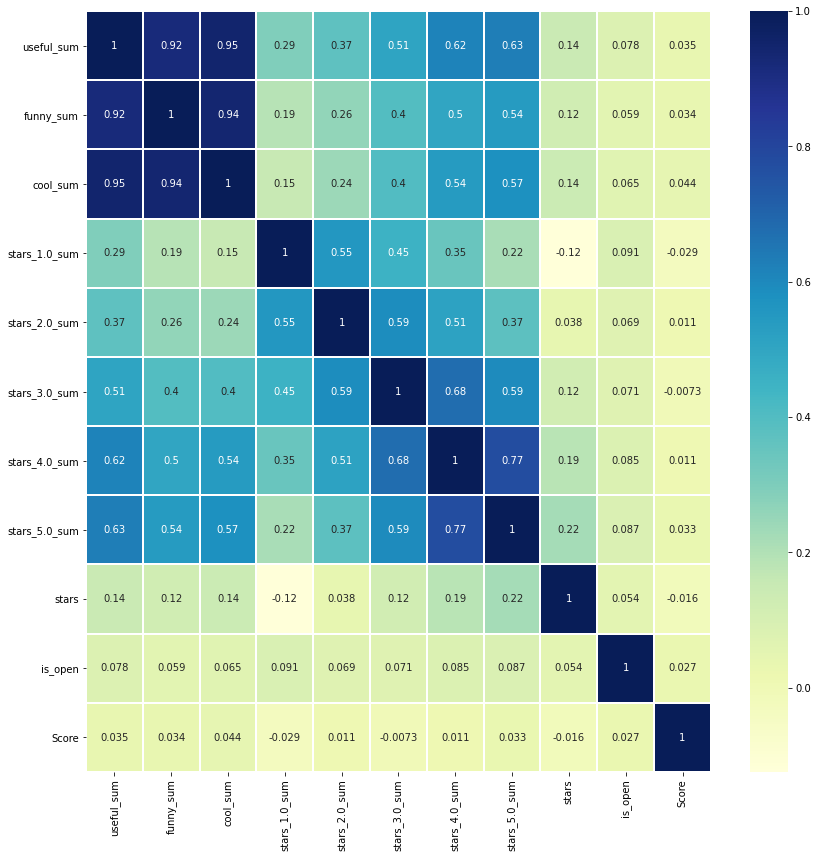

In [428]:
#plotting correlation matrix

plt.figure(figsize=(14,14))
sns.heatmap(inspections_reviews_merge2[non_dummy].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
#plt.show();

In [16]:
# adding/removing columns for correlation matrix

top50_flagged_cols.remove('Restaurants')
top50_flagged_cols.remove('funny_sum')
top50_flagged_cols.remove('cool_sum')
top50_flagged_cols.append('pass_fail_flag')

#### Similarly, not seeing super strong correlations with either 'Score' or 'pass_fail_flag' in heatmap below

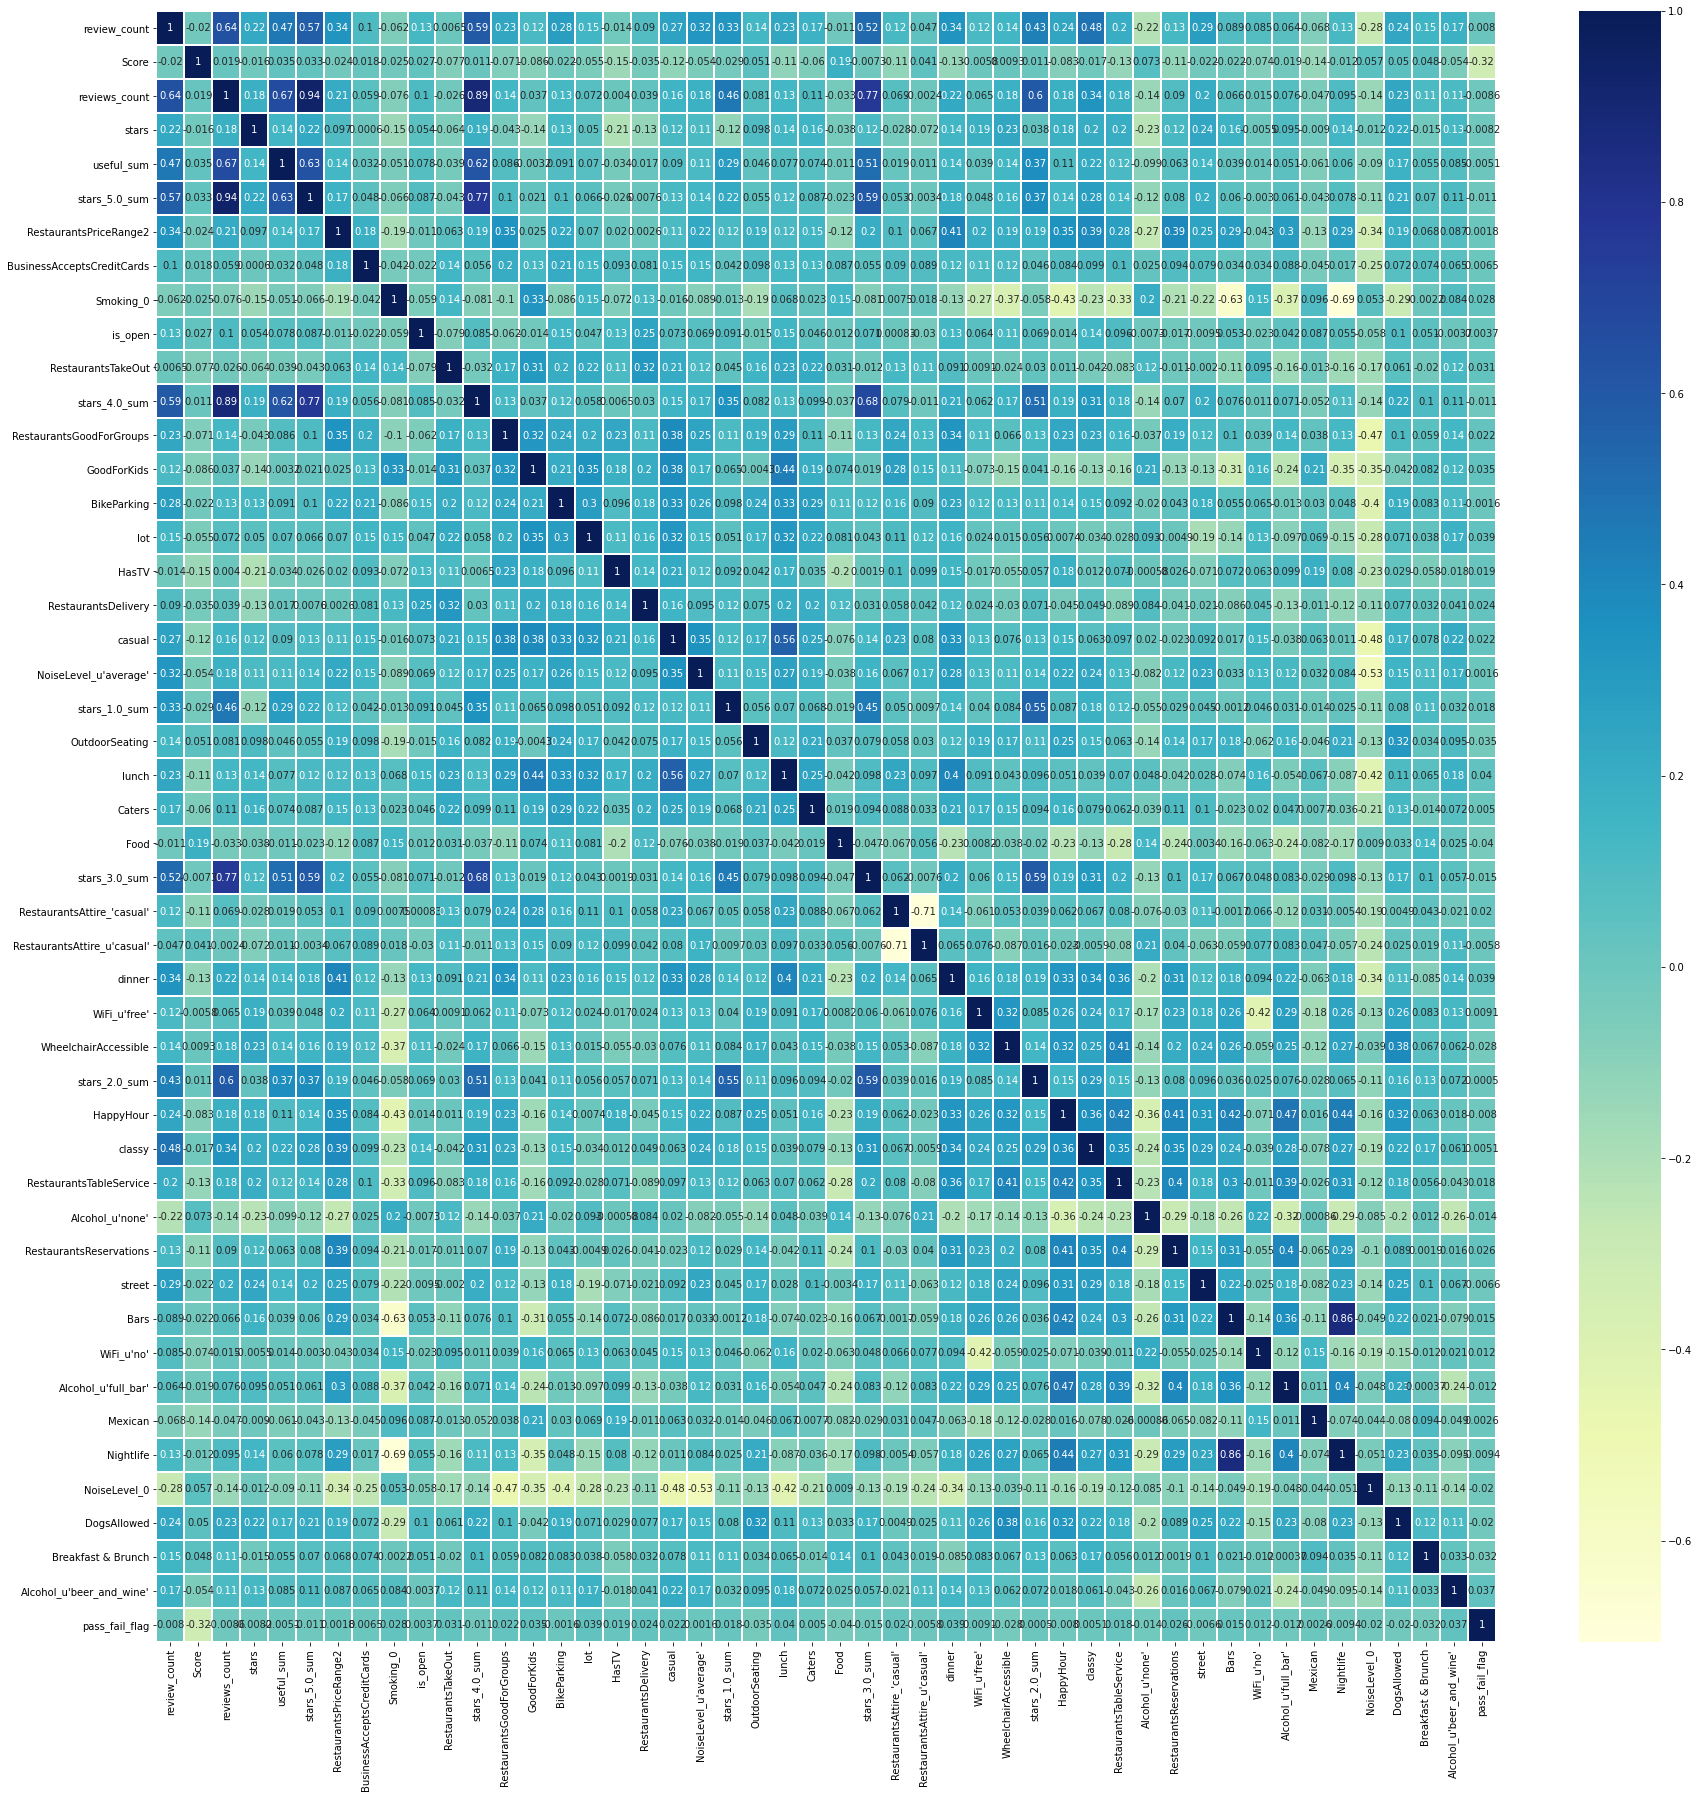

In [17]:
#plotting correlation matrix
# top 50 flagged columns

plt.figure(figsize=(30,30))
sns.heatmap(inspections_reviews_merge2[top50_flagged_cols].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

### Setting up an exploratory logisitic regression

In [18]:
rseed = 9887

In [19]:
#top50_flagged_cols
#xvars

In [644]:
#xvars = inspections_reviews_merge1.drop(non_numeric_cols, axis=1).sum().sort_values(ascending=False).index.tolist()
xvars = inspections_reviews_merge1[top50_flagged_cols].columns.tolist()

xvars.remove('pass_fail_flag')
#xvars.remove('Restaurants')
#xvars.remove('funny_sum')
#xvars.remove('cool_sum')
xvars.remove('review_count')
#xvars.remove('reviews_count')
xvars.remove('Score')
xvars.remove('stars_2.0_sum')
xvars.remove('stars')

print("number of vars: ",len(inspections_reviews_merge1[xvars].columns.tolist())) # number of vars

number of vars:  43


In [645]:
X = inspections_reviews_merge1[xvars]
y = inspections_reviews_merge1['pass_fail_flag']

In [646]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rseed)

In [647]:
X_train.head()

,reviews_count,useful_sum,stars_5.0_sum,RestaurantsPriceRange2,BusinessAcceptsCreditCards,Smoking_0,is_open,RestaurantsTakeOut,stars_4.0_sum,RestaurantsGoodForGroups,GoodForKids,BikeParking,lot,HasTV,RestaurantsDelivery,casual,NoiseLevel_u'average',stars_1.0_sum,OutdoorSeating,lunch,Caters,Food,stars_3.0_sum,RestaurantsAttire_'casual',RestaurantsAttire_u'casual',dinner,WiFi_u'free',WheelchairAccessible,HappyHour,classy,RestaurantsTableService,Alcohol_u'none',RestaurantsReservations,street,Bars,WiFi_u'no',Alcohol_u'full_bar',Mexican,Nightlife,NoiseLevel_0,DogsAllowed,Breakfast & Brunch,Alcohol_u'beer_and_wine'
3830,0.0,0.0,0.0,2,1.0,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0.0,1,1.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0,1,0.0,0.0,0,0.0,1.0,0
5911,0.0,0.0,0.0,1,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.0,0,0.0,1.0,0.0,0.0,0,0.0,1.0,1.0,0,0,0.0,1.0,1,0.0,0.0,0
5557,0.0,0.0,0.0,1,1.0,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0.0,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0,1.0,1.0,0.0,0.0,0,0.0,1.0,0.0,0,0,0.0,0.0,0,1.0,0.0,1
1427,0.0,0.0,0.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,1.0,0.0,1,0.0,0.0,0
887,0.0,0.0,0.0,1,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,1,0.0,1.0,0,0.0,0.0,0


In [648]:
from sklearn.preprocessing import MinMaxScaler

from numpy import asarray

data = asarray(X_train['reviews_count'].values.reshape(-1, 1))
#data = asarray(X_train['RestaurantsTakeOut'].values.reshape(-1, 1))
#print(data[0:5])

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
#print(scaled[0:5])

In [668]:
for i in X_train.columns:
    data = asarray(X_train[i].values.reshape(-1, 1))
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    X_train[i] = scaled

In [650]:
X_train.head(20)

,reviews_count,useful_sum,stars_5.0_sum,RestaurantsPriceRange2,BusinessAcceptsCreditCards,Smoking_0,is_open,RestaurantsTakeOut,stars_4.0_sum,RestaurantsGoodForGroups,GoodForKids,BikeParking,lot,HasTV,RestaurantsDelivery,casual,NoiseLevel_u'average',stars_1.0_sum,OutdoorSeating,lunch,Caters,Food,stars_3.0_sum,RestaurantsAttire_'casual',RestaurantsAttire_u'casual',dinner,WiFi_u'free',WheelchairAccessible,HappyHour,classy,RestaurantsTableService,Alcohol_u'none',RestaurantsReservations,street,Bars,WiFi_u'no',Alcohol_u'full_bar',Mexican,Nightlife,NoiseLevel_0,DogsAllowed,Breakfast & Brunch,Alcohol_u'beer_and_wine'
3830,0.000000,0.000000,0.000000,0.50,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5911,0.000000,0.000000,0.000000,0.25,1.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5557,0.000000,0.000000,0.000000,0.25,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1427,0.000000,0.000000,0.000000,0.25,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,0.000000,0.000000,0.000000,0.25,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2057,0.008065,0.008475,0.000000,0.25,1.0,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.060606,0.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3218,0.008065,0.000000,0.005348,0.25,1.0,1.0,1.0,1.0,0.022222,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4907,0.008065,0.000000,0.000000,0.25,1.0,1.0,1.0,1.0,0.022222,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.030303,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4914,0.012097,0.004237,0.010695,0.25,1.0,1.0,1.0,1.0,0.022222,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3191,0.004032,0.000000,0.000000,0.50,1.0,0.0,1.0,1.0,0.022222,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [651]:
# fitting logistic regression model
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.045070
         Iterations 12


In [652]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:         pass_fail_flag   No. Observations:                 4768
Model:                          Logit   Df Residuals:                     4725
Method:                           MLE   Df Model:                           42
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                  0.1239
Time:                        06:15:34   Log-Likelihood:                -214.89
converged:                       True   LL-Null:                       -245.27
Covariance Type:            nonrobust   LLR p-value:                   0.03052
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
reviews_count                  49.9626     65.510      0.763      0.446     -78.435     178.360
useful_sum                      0.6364      7.126      0.089      0.929     -13.

In [669]:
for i in X_test.columns:
    data = asarray(X_test[i].values.reshape(-1, 1))
    
    scaled = scaler.transform(data)
    X_test[i] = scaled

In [670]:
# performing predictions on the test datdaset

y_pred = log_reg.predict(X_test)
prediction = list(map(round, y_pred))

y_pred_full = log_reg.predict(X)
prediction_full = list(map(round, y_pred_full))

In [671]:
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
#cm_full = confusion_matrix(y, prediction_full) 
print ("Confusion Matrix : \n", cm) 
#print ("Confusion Matrix (full dataset): \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))
#print('Test accuracy (full dataset) = ', accuracy_score(y, prediction_full))

Confusion Matrix : 
 [[1015  169]
 [   6    2]]
Test accuracy =  0.8531879194630873


#### Doing some step-wise removal of variables from regression

In [656]:
#xvars = inspections_reviews_merge1.drop(non_numeric_cols, axis=1).sum().sort_values(ascending=False).index.tolist()
xvars = inspections_reviews_merge1[xvars].columns.tolist()

xvars.remove('stars_5.0_sum')
xvars.remove("WiFi_u'no'")
xvars.remove('Caters')
xvars.remove('useful_sum')
xvars.remove('HappyHour')
xvars.remove('RestaurantsDelivery')
xvars.remove('RestaurantsGoodForGroups')
xvars.remove("Alcohol_u'full_bar'")
xvars.remove('RestaurantsReservations')
xvars.remove('HasTV')
xvars.remove('classy')



print("number of vars: ",len(inspections_reviews_merge1[xvars].columns.tolist())) # number of vars

number of vars:  32


In [657]:
X = inspections_reviews_merge1[xvars]
y = inspections_reviews_merge1['pass_fail_flag']

In [658]:
#X.head()

In [659]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rseed)

In [660]:
#checking for unique values in training data, debugging error on 2nd run of logit with 10 fewer variables

#X_train.nunique()

In [665]:
# scaling data

for i in X_train.columns:
    data = asarray(X_train[i].values.reshape(-1, 1))
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    X_train[i] = scaled

In [662]:
# fitting logistic regression model
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.045372
         Iterations 11


In [663]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:         pass_fail_flag   No. Observations:                 4768
Model:                          Logit   Df Residuals:                     4736
Method:                           MLE   Df Model:                           31
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                  0.1180
Time:                        06:17:19   Log-Likelihood:                -216.34
converged:                       True   LL-Null:                       -245.27
Covariance Type:            nonrobust   LLR p-value:                  0.002386
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
reviews_count                   1.5053     18.577      0.081      0.935     -34.905      37.915
RestaurantsPriceRange2         -3.0818      1.177     -2.618      0.009      -5.

In [672]:
# exporting some data

full_dataset.to_csv('austin_restaurant_inspections_full_dataset.csv')

In [27]:
# potential next steps: 
# create time series, recency, season vars
# sentiment analysis on reviews